# IEEE 14-Bus Verification

Prepared by [Hantao Cui](https://cui.eecps.com). Last revised 23 May 2020. 

## Background

Two line trip scenarios are used to verify ANDES simulation results with DSATools TSAT.

Dynamic data is created to utilize the available models, including GENROU, TGOV1, IEEEG1, EXST2, EXDC2, ESST3A, IEEEST and ST2CUT. Test case data can be found at the end of the notebook.

### Simulation Parameters

Integretion method: Trapezidal Rule (ANDES and TSAT).

Time step size: `1/120` sec. (Note: step size between `1/30` to `1/120` has little impact on the ANDES results. One can use `tstep=1/30` to obtain almost the same results.)

Load conversion: static loads are converted to 100% constant impedances for both P and Q. 

TSAT automatic parameter correction is disabled.

### Initialization

Power flow solutions are identical across all the two software.

GENROU initialization ($E_{FD}$, $E_{TERM}$, $P$, $Q$, $\delta$, $I_d$ and $I_q$) is identical to that from **PSS/E** for all cases (with and without generator saturation). Note that $I_d$ and $I_q$ are in machine base in PSS/E but in system base in ANDES.  

GENROU initialization (including all the internal variables $E'_d$, $E'_q$, $\psi_{kd}$, $\psi_{kq}$, $\psi''_d$, and $\psi''_q$) is identical to that from [**OpenIPSL**](https://github.com/openipsl/openipsl).

No controller limit violation occurs during initialization.

### Conclusion

IEEE 14-bus system simulation results from ANDES are identical to that from TSAT.

In [1]:
import andes
import numpy as np
from andes.utils.tsat import tsat_to_df, plot_comparison, run_cmp

andes.config_logger(stream_level=30)

In [2]:
# load scenario 1 data
omega_lt2 = tsat_to_df('omega_lt2s.xls')
v_lt2 = tsat_to_df('v_lt2s.xls')

# load scenario 2 data
omega_gt = tsat_to_df('omega_gt.xls')
v_gt = tsat_to_df('v_gt.xls')

## Scenario 1

Line 1-2 trips at 1 sec. and reconnects after 2.0 sec. The reconnection delay is set to 2 seconds to trigger a large disturbance to the system to verify nonlinear models.

### Simulation Setup

In [3]:
ss = run_cmp('ieee14.raw', dyr='ieee14.dyr', fault_line='Line_1',
             t1=1.0, t2=3.0, tstep=1/120)

<Toggle Toggle_1>: Line.Line_1 status changed to 0.0 at t=1.0 sec.  
<Toggle Toggle_2>: Line.Line_1 status changed to 1.0 at t=3.0 sec.  
100%|████████████████████████████████| 100/100 [00:16<00:00,  6.15%/s]


### Scenario 1 Plots

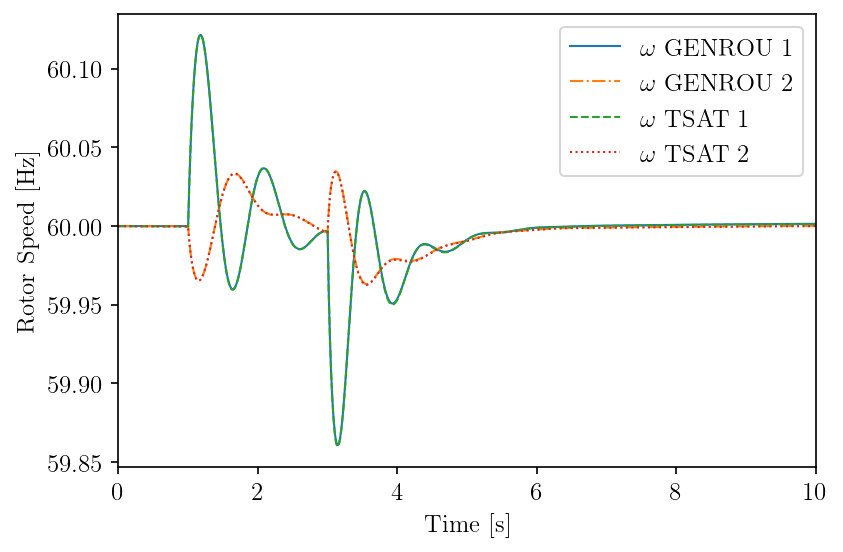

In [4]:
fig, ax = plot_comparison(ss, ss.GENROU.omega,
                omega_lt2, a=[0, 1],
                ylabel="Rotor Speed [Hz]",
                tsat_header=[r'$\omega$ TSAT 1', r'$\omega$ TSAT 2'],
                scale=60, left=0, right=10)

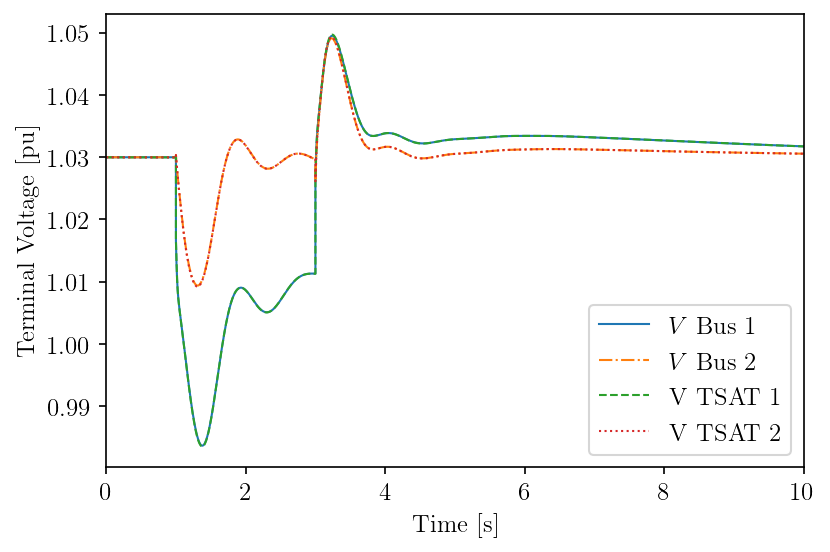

In [5]:
fig, ax = plot_comparison(ss, ss.GENROU.v,
                v_lt2, a=[0, 1],
                ylabel="Terminal Voltage [pu]",
                tsat_header=['V TSAT 1', 'V TSAT 2'],
                left=0, right=10)

## Scenario 2

Line 7-8 trips at 1 sec. and reconnects after 0.1 sec. The line is an equivalent branch of the three-winding transformer. Tripping 7-8 will isolate Bus 8.

### Simulation Setup

In [6]:
ss2 = run_cmp('ieee14.raw', dyr='ieee14.dyr', fault_line='Line_20',
             t1=1.0, t2=1.1, tstep=1/120)

<Toggle Toggle_1>: Line.Line_20 status changed to 0.0 at t=1.0 sec. 
<Toggle Toggle_2>: Line.Line_20 status changed to 1.0 at t=1.1 sec. 
100%|████████████████████████████████| 100/100 [00:12<00:00,  8.10%/s]


In [7]:
# line data
ss2.Line.cache.df.iloc[19]

idx       Line_20
u               1
name      Line_20
bus1            8
bus2            7
Sn            100
fn             60
Vn1            69
Vn2           138
r               0
x         0.17615
b               0
g               0
b1              0
g1              0
b2              0
g2              0
trans           1
tap       0.99677
phi             0
owner        None
xcoord       None
ycoord       None
Name: 19, dtype: object

### Scenario 2 Plots

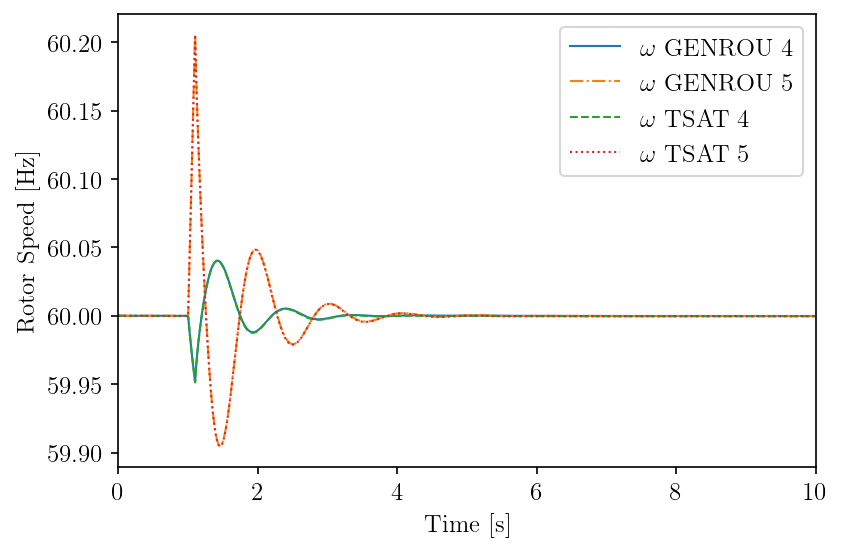

In [8]:
tsat_omega_headers = [ss.TDS.plt._fname[i + 1] for i in ss.GENROU.omega.a]
tsat_omega_headers = [i.replace('GENROU', 'TSAT') for i in tsat_omega_headers]

fig2, ax2 = plot_comparison(ss2, ss2.GENROU.omega,
                omega_gt, a=[3, 4],
                ylabel="Rotor Speed [Hz]",
                tsat_header=tsat_omega_headers,
                scale=60, left=0, right=10)

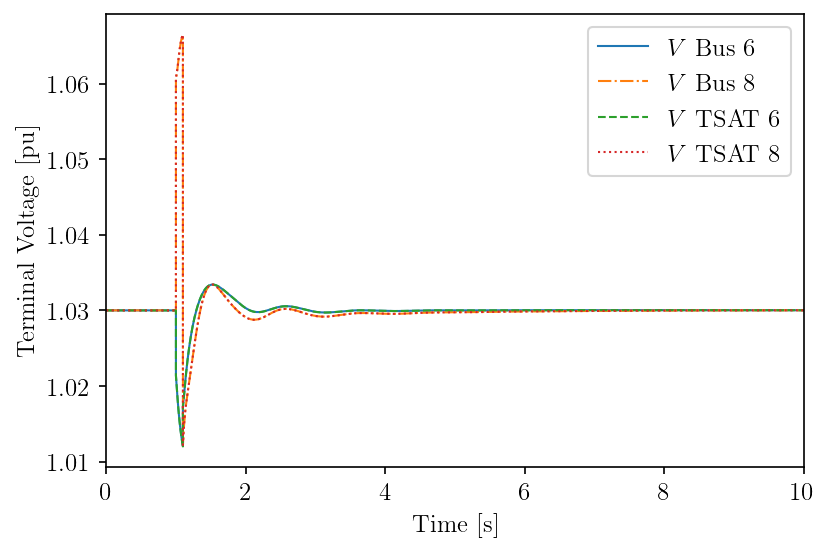

In [12]:
tsat_v_headers = [ss.TDS.plt._fname[i + 1 + ss.dae.n] for i in ss.GENROU.v.a]
tsat_v_headers = [i.replace('Bus', 'TSAT') for i in tsat_v_headers]

fig2, ax2 = plot_comparison(ss2, ss2.GENROU.v,
                v_gt, a=[3, 4],
                ylabel="Terminal Voltage [pu]",
                tsat_header=tsat_v_headers,
                left=0, right=10)

## Appendix

IEEE 14-Bus System Data

### Power Flow Data (PSS/E RAW format)

In [10]:
# !cat results won't save to PDF

data = !cat ieee14.raw 
print('\n'.join(data))

0,   100.00,  32, 0, 1, 60.00     / PSS(R)E 32 RAW created by rawd32  SUN, MAY 17 2020  20:38
 IEEE 14 BUS TEST CASE
DISTRIBUTED WITH ANDES (HTTPS://GITHUB.COM/CURENT/ANDES)
     1,'BUS1        ',  69.0000,3,   1,   1,   1,1.03000,   0.0000
     2,'BUS2        ',  69.0000,2,   1,   1,   1,1.01970,  -1.6032
     3,'BUS3        ',  69.0000,2,   1,   1,   1,1.00042,  -3.4433
     4,'BUS4        ',  69.0000,1,   1,   1,   1,0.99858,  -4.2812
     5,'BUS5        ',  69.0000,1,   1,   1,   1,1.00443,  -3.6850
     6,'BUS6        ', 138.0000,2,   2,   2,   2,0.99871,  -6.3024
     7,'BUS7        ', 138.0000,1,   2,   2,   2,1.00682,  -4.8292
     8,'BUS8        ',  69.0000,2,   2,   2,   2,1.01895,  -1.3945
     9,'BUS9        ', 138.0000,1,   2,   2,   2,1.00193,  -7.3053
    10,'BUS10       ', 138.0000,1,   2,   2,   2,0.99351,  -7.4600
    11,'BUS11       ', 138.0000,1,   2,   2,   2,0.99245,  -7.0444
    12,'BUS12       ', 138.0000,1,   2,   2,   2,0.98639,  -7.3874
    13,'BUS13       ',

### Dynamic Data (PSS/E DYR format)

In [11]:
data = !cat ieee14.dyr 
print('\n'.join(data))

      1 'GENROU' 1     6.5000      0.60000E-01  0.20000      0.50000E-01
          4.0000       0.0000       1.8000       1.7500      0.60000
         0.80000      0.23000      0.15000      0.90000E-01  0.38000      /
      1 'ST2CUT' 1          1            0            0            0
          0.0000       0.0000       0.0000       0.0000       30.000
          30.000      0.23000      0.25000E-01  0.23000      0.25000E-01
          0.0000       0.0000      0.60000E-01 -0.60000E-01   0.0000
          0.0000      /
      1 'ESST3A' 1    0.20000E-01  0.20000     -0.20000       8.0000
          1.0000       5.0000       20.000       0.0000       99.000
         -99.000       1.0000       3.6700      0.43500       5.4800
         0.10000E-01  0.98000E-02   3.8600       3.3300      0.40000
          99.000       0.0000    /
      1 'TGOV1'  1    0.50000E-01  0.50000E-01   1.0500      0.30000
          1.0000       2.1000       0.0000      /
      2 'GENROU' 1     6.5000      0.60000E-01  